In [39]:
import numpy as np
import matplotlib.pyplot as plt
import networkx
import importlib
import quasibi
from tqdm import tqdm
importlib.reload(quasibi);

In [2]:
# load the correlation matrices
pearson = quasibi.load_symmat("../output/pearson_correlation_matrix.npy")
rmd     = quasibi.load_symmat("../output/rmd_correlation_matrix.npy")

In [43]:
N = 10
ps = np.logspace(-1, -4, N)

M = np.zeros((N, 3, 2))

for i, p in tqdm(enumerate(ps), total=N):
    pearson_threshold = np.abs(pearson)
    pearson_threshold = pearson_threshold >= np.quantile(pearson_threshold, 1 - p)
    pearson_net = networkx.from_numpy_matrix(pearson_threshold)

    rmd_threshold = np.abs(rmd)
    rmd_threshold = rmd_threshold >= np.quantile(rmd_threshold, 1 - p)
    rmd_net = networkx.from_numpy_matrix(rmd_threshold)

    random_net = networkx.erdos_renyi_graph(1000, p)
    random     = networkx.to_numpy_array(random_net)

    # global clustering coefficient
    for j, net in enumerate([random_net, pearson_net, rmd_net]):
        for k, metric in enumerate([networkx.average_clustering, networkx.average_shortest_path_length]):
            try:
                M[i, j, k] = metric(net)
            except:
                M[i, j, k] = np.nan

100%|██████████| 10/10 [00:33<00:00,  3.40s/it]


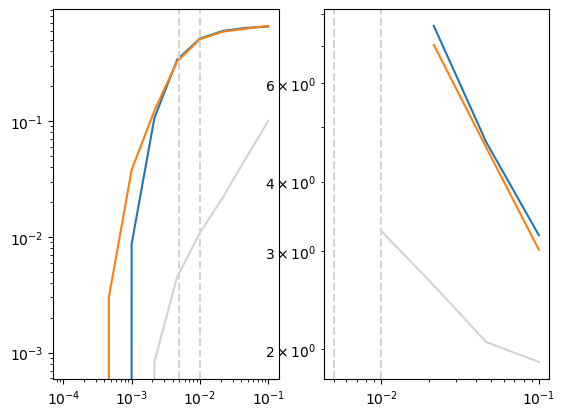

In [45]:
fig, axs = plt.subplots(1, 2)

for i, ax in enumerate(axs.flatten()):
    ax.plot(ps, M[:,0,i], c="lightgray")
    ax.plot(ps, M[:,1:,i])
    ax.loglog()
    ax.axvline(0.005, c="lightgray", ls="--")
    ax.axvline(0.01, c="lightgray", ls="--")